Precisión del modelo KNN: 0.83


<ipython-input-3-a380050b5b3c>:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', s=100, label='Prueba')


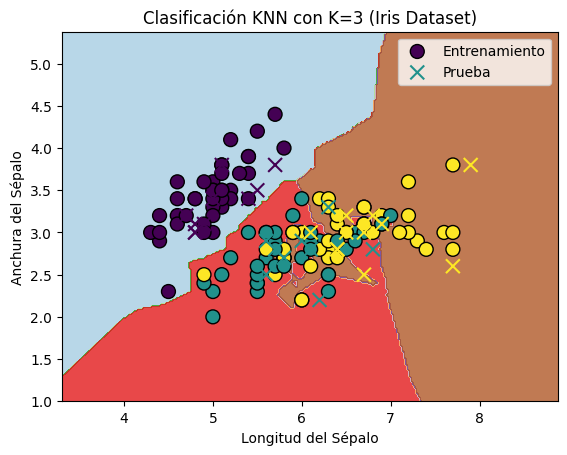

In [3]:
# Ejemplo de Clasificación con K-Nearest Neighbors con visualización
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar datos de flores Iris
iris = load_iris()
X = iris.data[:, :2]  # Usamos solo las dos primeras características (longitud y anchura del sépalo)
y = iris.target  # Etiquetas (tipos de flores)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy:.2f}')

# Visualización de los resultados
# Crear una malla para las predicciones
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecir en cada punto de la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear la gráfica de las regiones de decisión
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Dibujar los puntos de entrenamiento y prueba
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', s=100, label='Entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', s=100, label='Prueba')

# Etiquetas de los ejes
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Anchura del Sépalo')
plt.title('Clasificación KNN con K=3 (Iris Dataset)')
plt.legend()
plt.show()
